In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
starting_line = {(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)}
finishing_line = {(16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (16, 31)}
track = {
    (3,1), (4,1), (5,1), (6,1), (7,1), (8,1),
    (3,2), (4,2), (5,2), (6,2), (7,2), (8,2),
    (2,3), (3,3), (4,3), (5,3), (6,3), (7,3), (8,3),
    (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (8,4),
    (2,5), (3,5), (4,5), (5,5), (6,5), (7,5), (8,5),
    (2,6), (3,6), (4,6), (5,6), (6,6), (7,6), (8,6),
    (2,7), (3,7), (4,7), (5,7), (6,7), (7,7), (8,7),
    (2,8), (3,8), (4,8), (5,8), (6,8), (7,8), (8,8),
    (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9),
    (1,10), (2,10), (3,10), (4,10), (5,10), (6,10), (7,10), (8,10),
    (1,11), (2,11), (3,11), (4,11), (5,11), (6,11), (7,11), (8,11),
    (1,12), (2,12), (3,12), (4,12), (5,12), (6,12), (7,12), (8,12),
    (1,13), (2,13), (3,13), (4,13), (5,13), (6,13), (7,13), (8,13),
    (1,14), (2,14), (3,14), (4,14), (5,14), (6,14), (7,14), (8,14),
    (1,15), (2,15), (3,15), (4,15), (5,15), (6,15), (7,15), (8,15),
    (1,16), (2,16), (3,16), (4,16), (5,16), (6,16), (7,16), (8,16),
    (1,17), (2,17), (3,17), (4,17), (5,17), (6,17), (7,17), (8,17),
    (0,18), (1,18), (2,18), (3,18), (4,18), (5,18), (6,18), (7,18), (8,18),
    (0,19), (1,19), (2,19), (3,19), (4,19), (5,19), (6,19), (7,19), (8,19),
    (0,20), (1,20), (2,20), (3,20), (4,20), (5,20), (6,20), (7,20), (8,20),
    (0,21), (1,21), (2,21), (3,21), (4,21), (5,21), (6,21), (7,21), (8,21),
    (0,22), (1,22), (2,22), (3,22), (4,22), (5,22), (6,22), (7,22), (8,22),
    (0,23), (1,23), (2,23), (3,23), (4,23), (5,23), (6,23), (7,23), (8,23),
    (0,24), (1,24), (2,24), (3,24), (4,24), (5,24), (6,24), (7,24), (8,24),
    (0,25), (1,25), (2,25), (3,25), (4,25), (5,25), (6,25), (7,25), (8,25), (9,25),
    (0,26), (1,26), (2,26), (3,26), (4,26), (5,26), (6,26), (7,26), (8,26), (9,26), (10,26), (11,26), (12,26), (13,26), (14,26), (15,26),
    (0,27), (1,27), (2,27), (3,27), (4,27), (5,27), (6,27), (7,27), (8,27), (9,27), (10,27), (11,27), (12,27), (13,27), (14,27), (15,27),
    (1,28), (2,28), (3,28), (4,28), (5,28), (6,28), (7,28), (8,28), (9,28), (10,28), (11,28), (12,28), (13,28), (14,28), (15,28),
    (2,29), (3,29), (4,29), (5,29), (6,29), (7,29), (8,29), (9,29), (10,29), (11,29), (12,29), (13,29), (14,29), (15,29),
    (2,30), (3,30), (4,30), (5,30), (6,30), (7,30), (8,30), (9,30), (10,30), (11,30), (12,30), (13,30), (14,30), (15,30),
    (3,31), (4,31), (5,31), (6,31), (7,31), (8,31), (9,31), (10,31), (11,31), (12,31), (13,31), (14,31), (15,31)
}

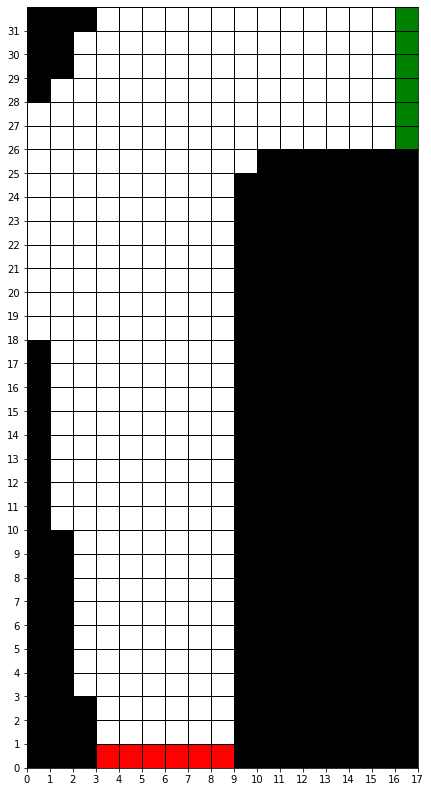

In [3]:
data = np.zeros((32, 17))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if(j, i) in track:
            data[i, j] = 1
        elif(j, i) in starting_line:
            data[i, j] = 2
        elif(j, i) in finishing_line:
            data[i, j] = 3
fig, ax = plt.subplots(figsize=(7, 14))
ax.set_xticks(np.arange(0, 18, 1))
ax.set_yticks(np.arange(0, 32, 1))
cmap = colors.ListedColormap(["black", "white", "red", "green"])
plt.pcolormesh(data, edgecolors="k", cmap=cmap)